This notebook looks at the approximation of the logarithm of the CTPMH (compound truncated Poisson multivariate hypergeometric) fudge factor relative to the compound Poisson multinomial, to see when it is approximately 0 (the CTPMH joint probabilities are approximately 1 times the compound Poisson multinomial ones, marginals are approximately independent), and when it is not approximately 0. 

This is for bivariate CTPMH/compound Poisson multinomial (i.e. there are only two strains, $s_1$ and $s_2$), since plotting higher-dimensional ones would obviously be tricky at best. Here we are looking at forming a droplet when there are $100$ total cells of strain $s_1$ and $100$ total cells of strain $s_2$, thus $100 + 100 = 200$ cells total.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

OK first let's just look at the shape of the sort of function we are dealing with for each of the $K_1$, $K_2$, and $K=K_1+K_2$

In [2]:
# x = sampled number of cells (of strain), C = total number of cells (of strain)
phi = lambda x, C:  (C - x)*( np.log(C) - np.log(C - x)  )

In terms of $\Phi$, as a refresher, the logarith of the fudge factor would approximately be (using asymptotic Stirling approximation for binomial coefficients, rather than either of the two specific upper or lower bounds)

$$ \Phi(k_1, K_1) + \Phi(k_2, K_2) - \Phi(k_1 + k_2, K) + \log (\mathbb{P}(\operatorname{Pois}(\lambda) \le K)) $$

where by definition $K = K_1 + K_2$. Note that for $\lambda \in [1,2]$, the regime we're interested in, alreadly $\mathbb{P}(\operatorname{Pois}(\lambda) \le K)$ is approximately $1$, so its logarithm should be approximately $0$, and so we can (likely) safely ignore the additive constant it represents in what follows.

In [3]:
x_values = np.arange(start=0, stop=100, step=0.0001)
y_values = phi(x_values, 100)

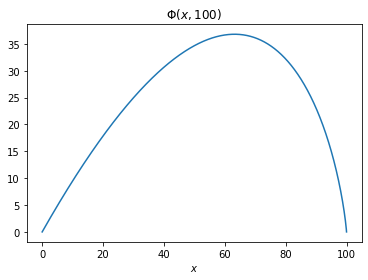

In [4]:
plt.title('$\Phi(x,100)$')
plt.xlabel('$x$')
plt.plot(x_values, y_values)
plt.show()

OK so that's what one of the terms in the expression resulting from the Stirling approximation of the logarithm of the fudge factor looks like. However, the logarithm of the fudge factor is the sum of two of these (in the two strain case) minus a third one corresponding to bigger numbers (the sum of the parameters defining the other two). So what does the whole expression look like?

Since plotting 2-dimensional functions can be hard, let's just (first) plot the value of the bivariate function on the diagonal $x=y$, i.e. the subset of points in $[0,100] \times [0,100]$ of the form $(x,x)$.

In [5]:
y_values_2 = (2*np.array(y_values)) - ( (200 - 2*x_values)* (np.log(200) - np.log(200 - 2*x_values))   )

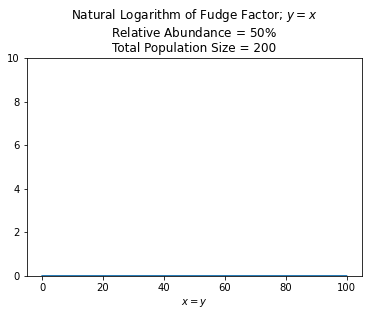

In [6]:
plt.plot(x_values, y_values_2)
plt.title('Natural Logarithm of Fudge Factor; $y=x$\nRelative Abundance = $50\%$\nTotal Population Size = 200')
plt.xlabel('$x=y$')
plt.ylim((0,10))
plt.show()

In [7]:
y_values_2

array([0.00000000e+00, 1.77635521e-13, 1.77635359e-13, ...,
       0.00000000e+00, 8.67361738e-19, 4.33680869e-19])

This is really tiny. It is not exactly/constantly $0$, but it is really close.

However, we are only plotting the value of the bivariate function along the diagonal line $x = y$ in the plot above. Is it really nearly identically $0$ everywhere, or just on the diagonal???

Let's look at the intersection of the line $y = 2x$ with the box $[0,100] \times [0,100]$, so 

In [8]:
x_values_3 = (0.5)*x_values
# so y = 2x
y_values_3 = x_values

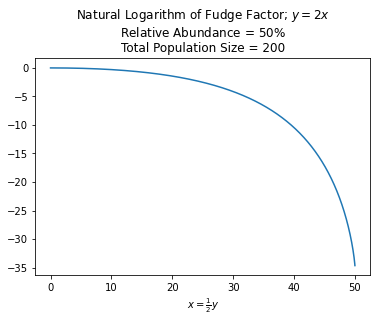

In [9]:
slant_line_values = phi(x_values_3,100) + phi(y_values_3,100) - phi(x_values_3+y_values_3,200)
plt.plot(x_values_3, slant_line_values)
plt.xlabel('$x = \\frac{1}{2} y$')
plt.title('Natural Logarithm of Fudge Factor; $y=2x$\nRelative Abundance = $50\%$\nTotal Population Size = 200')
plt.show()

OK, this sort of seems to raise more questions than it answers. Can we try looking at a heatmap to make a "3D" plot of this?

I.e. look at "all lines at once", instead of trying to infer trends from a bunch of different looking plots?

In [10]:
meshgrid = np.meshgrid(np.arange(start=0,stop=100,step=1),np.arange(start=0,stop=100,step=1))

In [11]:
y_meshgrid = phi(meshgrid[0],100) + phi(meshgrid[1],100) - phi(meshgrid[0]+meshgrid[1],200)

In [12]:
y_meshgrid.shape

(100, 100)

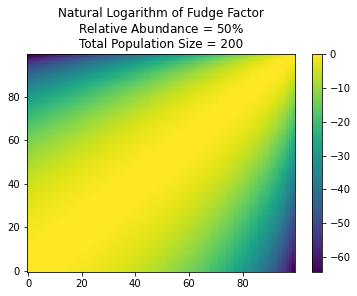

In [13]:
fig, ax = plt.subplots()
# why on earth is `shading='flat'` the default argument, and not `shading='auto'` if the former is guaranteed to throw errors?
psm = ax.pcolormesh(np.arange(start=0,stop=100,step=1), np.arange(start=0,stop=100,step=1), y_meshgrid, shading='nearest')
# seriously this is stupid, `shading='nearest'` is the only one that corresponds to plotting a 2D function, so why on
# Earth would anyone be using this differently. argh https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolormesh_grids.html
ax.set_title('Natural Logarithm of Fudge Factor\nRelative Abundance = $50\%$\nTotal Population Size = 200')
fig.colorbar(psm, ax=ax)
plt.show()

OK, so this is nearly exactly $0$ on the diagonal, as we would have predicted from one of the plots above. It is also substantially close to $0$ for a fairly wide region around the diagonal, and all the more so for small numbers of sampled cells. But it is even near $0$ for large numbers of sampled cells, as long as there is a large number for all strains simultaneously (i.e. balanced), but of course the width of the "near-$0$" region narrows as one moves from lower left to upper right. Also it does decrease substantially along a slanted line like $y=2x$. So all of this is a good sanity check/fits in together rather well.

Still this plot is really good news, since practically speaking we are only interested in the area very near to the origin in the lower left corner. And it says that for the region we actually care about (since that is by far where the vast majority of the bulk of the probability mass is located), the CTPMH distribution is almost exactly the same as the compound Poisson multinomial distribution. And this is only for $100$ of each strain, which would be ridiculously small, like even assuming a total population size of only one million cells, this would correspond to a relative abundance of $0.01\%$ for each of the two strains, which is exactly the same as the lowest possible relative abundances we are looking at. So even for those most non-abundant strains, the sampling with replacement approximation should still be functionally equivalent to the sampling without replacement truth. Wow.

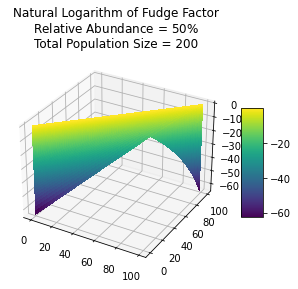

In [14]:
# copy-pasted from here https://glowingpython.blogspot.com/2012/01/how-to-plot-two-variable-functions-with.html and then modified
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(np.arange(start=0,stop=100,step=1), np.arange(start=0,stop=100,step=1), y_meshgrid, rstride=1, 
                       cmap=cm.viridis, cstride=1,linewidth=0, antialiased=False)
plt.title('Natural Logarithm of Fudge Factor\nRelative Abundance = $50\%$\nTotal Population Size = 200')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

OK looks more or less like expected, but hardly legible/visible

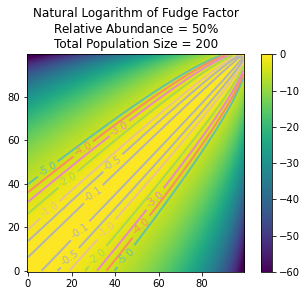

In [33]:
# copy-pasted from here https://glowingpython.blogspot.com/2012/01/how-to-plot-two-variable-functions-with.html and then modified
im = plt.imshow(y_meshgrid,cmap=cm.viridis, origin='lower', vmin=-60, vmax=0) # drawing the function
# adding the Contour lines with labels
cset = plt.contour(y_meshgrid, [-5,-4,-3,-2,-1,-0.5,-.1],linewidths=2,cmap=cm.Set2)
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.colorbar(im) # adding the colobar on the right
plt.title('Natural Logarithm of Fudge Factor\nRelative Abundance = $50\%$\nTotal Population Size = 200')
# latex fashion title
plt.show()

In [16]:
np.exp(-0.1)

0.9048374180359595

In [17]:
less_than_6_cell_droplets = np.where( (np.where(y_meshgrid > -.1)[0] + np.where(y_meshgrid > -.1)[1]) <= 6  )
print(list(zip(np.where(y_meshgrid > -.1)[0][less_than_6_cell_droplets], np.where(y_meshgrid > -.1)[1][less_than_6_cell_droplets])))

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (6, 0)]


Therefore, for all droplets with six or fewer cells, which make up by far the vast majority of the probability mass, the sampling-without-replacement probability is still more than $90.4\%$ of the approximate sampling-with-replacement probability. And this is for strains with $.01\%$ abundance for one million droplets per batch, or $0.1\%$ abundance for $100,000$ droplets per batch. So the approximation actually appears to be pretty good.

## What about population size of $100,000$?

It takes some algebra, which is omitted from this notebook, that simply swapping $200$ for $100,000$ is enough the get the correct approximate logarithm of fudge factor (assuming I did the algebra correctly).

But anyway we are now assuming that there are now other strains of cells making up the remaining $99.8\% $ of the population, $100,000 -200$ cells, but none of them are sampled for the sake of simplicity. How are the probabilities affected?

In [18]:
y_meshgrid_2 = phi(meshgrid[0],100) + phi(meshgrid[1],100) - phi(meshgrid[0]+meshgrid[1],100000)

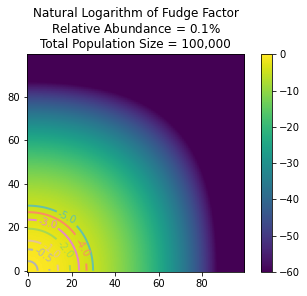

In [34]:
# copy-pasted from here https://glowingpython.blogspot.com/2012/01/how-to-plot-two-variable-functions-with.html and then modified
im = plt.imshow(y_meshgrid_2,cmap=cm.viridis, origin='lower', vmin=-60, vmax=0) # drawing the function
# adding the Contour lines with labels
cset = plt.contour(y_meshgrid_2, [-5,-4,-3,-2,-1,-0.5,-.1],linewidths=2,cmap=cm.Set2)
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.colorbar(im) # adding the colobar on the right
plt.title('Natural Logarithm of Fudge Factor\nRelative Abundance = $0.1\%$\nTotal Population Size = 100,000')
# latex fashion title
plt.show()

I double-checked the algebra, and I think that this result is right. 

Anyway it seems fairly clear from this graph that the fudge factors will be worse in this case than before. Keep in mind this doesn't directly say anything about the probabilities themselves, only their values relative to the corresponding/analogous compound Poisson multinomial probabilities.

In [20]:
less_than_6_cell_droplets = np.where( (np.where(y_meshgrid_2 > -.1)[0] + np.where(y_meshgrid_2 > -.1)[1]) <= 6  )
print(list(zip(np.where(y_meshgrid_2 > -.1)[0][less_than_6_cell_droplets], np.where(y_meshgrid_2 > -.1)[1][less_than_6_cell_droplets])))

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3), (4, 0), (4, 1)]


hm so now only droplets with up to five cells still have at least $90.5\%$ of the sampling with replacement probability? (And even then not all droplets with five cells, i.e. not $(0,5)$ or $(5,0)$.) 


Here's what I think is going on: We expect at least two effects, right?

1. For a fixed total population size, decreasing the relative abundance will make the fudge factors worse.
2. For a fixed relative abundance, increasing the total population will make the fudge factors better.

The former effect (1) would be because the smaller the relative abundance, the more (in relative terms) the probabilities change for sampling additional cells. For example, if you have a fixed total population of $100$, and a relative abundance of $5\%$, after sampling the first cell, the probability of sampling a second cell is now $4/99 \approx 4%$, which is about a $20\%$ decrease from the probability of sampling the first cell (whereas if it was sampling with replacement, both probabilities should be the same). Meanwhile, with a relative abundance of $10\%$ from the same population, the probability of sampling a second cell is $9/99 = 1/11 \approx 10%$, which is only about a $10\%$ decrease from the probability of sampling the first cell. 

The latter effect (2) is because the relative abundance corresponds to the $p$ parameters in the multinomial part of the compound Poisson multinomial. We expect that for fixed $p$ parameters (i.e. relative abundances), in the limit as the total population size goes to infinity, the distribution should converge to the compound Poisson multinomial, and thus in particular the fudge factors should converge to $1$ (so their approximate logarithms should converge to $0$).

**So what I think is going on is**, when you combine effects (1) and (2), i.e. by keeping the total number of cells constant but increasing the population size, thereby also decreasing the relative abundance, the effect of the hit caused by decreasing the relative abundance outweighs the effect of improvement caused by increasing the population size.

In the above, originally for population size $200$ the relative change in probability for sampling a second cell from the probability for sampling the first cell was $(\frac{1}{2}-\frac{99}{199})/(\frac{1}{2}) \approx 0.5\%$. In the population size of $100,000$, the relative change in probability for sampling the second cell from the probability for sampling the first cell was $(\frac{1}{1000} - \frac{99}{99999})/(\frac{1}{1000}) \approx 1\%$ which is clearly worse. While the absolute change in probability might be smaller, the relative change is (most likely) more relevant, since what the fudge factor accounts for, and how sampling with replacement can fail to approximate sampling without replacement, is that the probability is constant for the former but not for the latter. Like the fudge factor is entirely about fixing the absence of relative change from the sampling with replacement.

### how to test above hypothesized explanation

The proposed hypothesis being true would imply two things:

**(a)** The graph of relative abundance $(100)/(100000)$ in the population size $200$ (yes I realize that would not be "physical" but for various reasons that doesn't matter for now) will be even worse than the second graph above, because it is same relative abundance but smaller total population size. It should also be worse than the first graph above, because it is worse relative abundance but same total population size.  
**(b)** The graph of relative abundance $(100)/(200)$ in the population size $100,000$ should be even better than the first graph above, because it is same relative abundance but larger total population size. It should also be better than the second graph above, because it is better relative abundance but same total population size.

#### graph for **(a)**

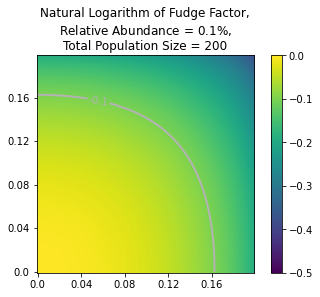

In [30]:
y_meshgrid_a = phi((0.2/100)*meshgrid[0],0.2) + phi((0.2/100)*meshgrid[1],0.2) - phi((0.2/100)*meshgrid[0]+(0.2/100)*meshgrid[1],200)

im = plt.imshow(y_meshgrid_a,cmap=cm.viridis, origin='lower', vmin=-0.5, vmax=0) # drawing the function
cset = plt.contour(y_meshgrid_a, [-5,-4,-3,-2,-1,-0.5,-.1],linewidths=2,cmap=cm.Set2)
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.xticks(np.arange(start=0,stop=100,step=20), labels=np.arange(start=0,stop=100,step=20)*(0.2/100))
plt.yticks(np.arange(start=0,stop=100,step=20), labels=np.arange(start=0,stop=100,step=20)*(0.2/100))
plt.colorbar(im) # adding the colobar on the right

plt.title('Natural Logarithm of Fudge Factor,\nRelative Abundance = $0.1\\%$,\nTotal Population Size = 200')
# latex fashion title
plt.show()

OK one problem with interpretation of all of these might be the fact that their color bars are all on different scales so...

Anyway in absolute terms this might be worse than the first one simply because the x and y labels have maximum of $0.2$. But it also isn't really fair either because then it would be doomed to have better thing than population $100$ simply because it's not even defined beyond the $0.2 \times 0.2$ little square in the lower left corner of $[0,100]\times [0,100]$. 

Also compared to the second one though this one again seems clearly better unless you're going to make the same argument about the size of the square being smaller in absolute terms. But since the size of the square being smaller in absolute terms was pretty much a given due to the absolute number of cells being smaller...

Basically the graphs don't actually seem comparable, making all of this even more iffy for me to try to think about/parse properly.

I guess I can try plotting the subsets of the first two plots corresponding to the square $[0,0.2]\times [0,0.2]$ to see if we get a clearer comparison?

/opt/conda/miniconda3/envs/interactome/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: No contour levels were found within the data range.
  after removing the cwd from sys.path.


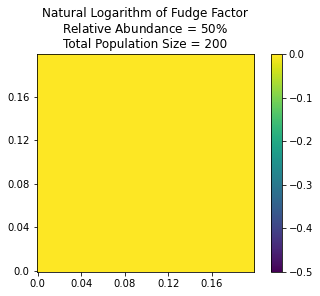

In [31]:
y_meshgrid_1a = phi((0.2/100)*meshgrid[0],100) + phi((0.2/100)*meshgrid[1],100) - phi((0.2/100)*meshgrid[0]+(0.2/100)*meshgrid[1],200)

im = plt.imshow(y_meshgrid_1a,cmap=cm.viridis, origin='lower', vmin=-0.5, vmax=0) # drawing the function
cset = plt.contour(y_meshgrid_1a, [-5,-4,-3,-2,-1,-0.5,-.1],linewidths=2,cmap=cm.Set2)
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.colorbar(im) # adding the colobar on the right
plt.xticks(np.arange(start=0,stop=100,step=20), labels=np.arange(start=0,stop=100,step=20)*(0.2/100))
plt.yticks(np.arange(start=0,stop=100,step=20), labels=np.arange(start=0,stop=100,step=20)*(0.2/100))

plt.title('Natural Logarithm of Fudge Factor\nRelative Abundance = $50\%$\nTotal Population Size = 200')
# latex fashion title
plt.show()

OK yeah this is the first graph restricted to $[0.2] \times [0.2]$, and as you said it is in fact much better. Than the thing shown above.

/opt/conda/miniconda3/envs/interactome/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


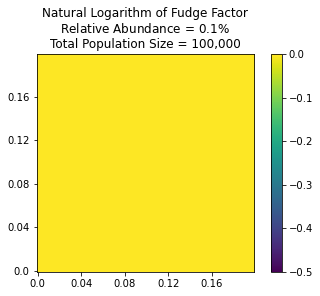

In [32]:
y_meshgrid_2a = phi((0.2/100)*meshgrid[0],100) + phi((0.2/100)*meshgrid[1],100) - phi((0.2/100)*meshgrid[0]+(0.2/100)*meshgrid[1],100000)
# copy-pasted from here https://glowingpython.blogspot.com/2012/01/how-to-plot-two-variable-functions-with.html and then modified
im = plt.imshow(y_meshgrid_2a,cmap=cm.viridis, origin='lower', vmin=-0.5, vmax=0) # drawing the function
# adding the Contour lines with labels
cset = plt.contour(y_meshgrid_2a, [-5,-4,-3,-2,-1,-0.5,-.1],linewidths=2,cmap=cm.Set2)
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.colorbar(im) # adding the colobar on the right
plt.xticks(np.arange(start=0,stop=100,step=20), labels=np.arange(start=0,stop=100,step=20)*(0.2/100))
plt.yticks(np.arange(start=0,stop=100,step=20), labels=np.arange(start=0,stop=100,step=20)*(0.2/100))
plt.title('Natural Logarithm of Fudge Factor\nRelative Abundance = $0.1\%$\nTotal Population Size = 100,000')
# latex fashion title
plt.show()

Yeah OK so restricted to $[0,0.2] \times [0,0.2]$ the first two graphs are much better.

Moreover the graph with the higher relative abundance but same population size has even better values than the graph with the same relative abundance but higher population size. (Of course one can't see this anymore when the plots are put onto the same color scale as the original.) The point being though that this seems to support the assertion that the relative abundance effect would be expected to be larger than the population size effect.

#### graph for **(b)**

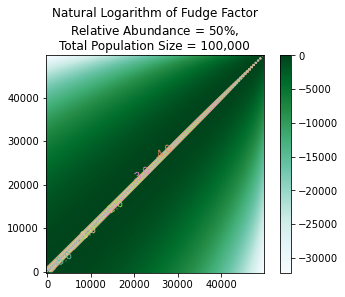

In [39]:
y_meshgrid_b = phi((50000/100)*meshgrid[0],50000) + phi((50000/100)*meshgrid[1],50000) - phi((50000/100)*meshgrid[0]+(50000/100)*meshgrid[1],100000)

im = plt.imshow(y_meshgrid_b,cmap=cm.BuGn, origin='lower') # drawing the function
cset = plt.contour(y_meshgrid_b, [-5,-4,-3,-2,-1,-0.5,-.1],linewidths=2,cmap=cm.Set2)
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.colorbar(im) # adding the colobar on the right
plt.xticks(np.arange(start=0,stop=100,step=20), labels=(np.arange(start=0,stop=100,step=20)*(50000/100)).astype(int)) 
plt.yticks(np.arange(start=0,stop=100,step=20), labels=(np.arange(start=0,stop=100,step=20)*(50000/100)).astype(int)) 
plt.title('Natural Logarithm of Fudge Factor\nRelative Abundance = $50\\%$,\nTotal Population Size = 100,000')
# latex fashion title
plt.show()

yeah I'm just going to level with you, I don't really know how to interpret any of this honestly, since it is a square on $[0,50000] \times [0,50000]$.

Below only the portion corresponding to the square $[0,100] \times [0,100]$ is plotted

/opt/conda/miniconda3/envs/interactome/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: No contour levels were found within the data range.
  after removing the cwd from sys.path.


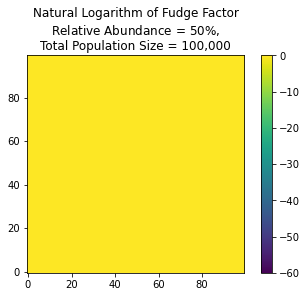

In [35]:
y_meshgrid_b = phi(meshgrid[0],50000) + phi(meshgrid[1],50000) - phi(meshgrid[0]+meshgrid[1],100000)

im = plt.imshow(y_meshgrid_b,cmap=cm.viridis, origin='lower', vmin=-60, vmax=0) # drawing the function
cset = plt.contour(y_meshgrid_b, [-5,-4,-3,-2,-1,-0.5,-.1],linewidths=2,cmap=cm.Set2)
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.colorbar(im) # adding the colobar on the right
plt.title('Natural Logarithm of Fudge Factor\nRelative Abundance = $50\\%$,\nTotal Population Size = 100,000')
# latex fashion title
plt.show()

OK so looking at the entire $[0,50000] \times [0,50000]$ box it appears to be clearly worse, but looking only at the $[0,100] \times [0,100]$ box, it seems to be way better than both.